# Sales Analysis

#### Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import os


#### Task 1:  Merge 12 months of sales data into a single file CSV file

In [2]:
# Read the CSV files for each month

files = [file for file in os.listdir('Sales_Data')]

all_months_data = pd.DataFrame()

# Concat the months in a unique CSV file;

for file in files:
    df = pd.read_csv('Sales_Data/' + file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data = all_months_data.sort_values(by=['Order Date'])

all_months_data.to_csv('all_data.csv', index = False)

#### Read in updated dataframe

In [3]:
all_data = pd.read_csv('all_data.csv', low_memory = False)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001"
1,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016"
2,149343,Apple Airpods Headphones,1,150,01/01/19 04:56,"735 5th St, New York City, NY 10001"
3,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001"
4,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301"


#### Clean up the data

In [4]:
# Contagem de quantas linhas NaN existem em cada uma das colunas

all_data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [5]:
# Apagando todas as linhas NaN

all_data = all_data.dropna(axis = 0)

In [6]:
all_data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

#### Augment data with additinal columns



#### Task 2: Add month column

In [7]:
# Split da coluna pelo caracter '/' e filtro para pegar o índice correspondente ao mês
all_data['Order Date'].str.split('/').str[0]

# Criando a coluna 'Month'
all_data['Month'] = all_data['Order Date'].str.split('/').str[0]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001",01
1,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016",01
2,149343,Apple Airpods Headphones,1,150,01/01/19 04:56,"735 5th St, New York City, NY 10001",01
3,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001",01
4,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301",01


In [8]:
# Verificando o tipo de dados da coluna 'Month'
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [9]:
# Mudando o tipo de dados da coluna 'Month' para int32
# all_data.Month.astype('int32') -> Esse comando gera um erro

In [10]:
# Como não foi possível fazer a alteração temos que verificar os valores inseridos na coluna 'Month'
all_data.groupby(['Month']).count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Month,,,,,,
01,9709,9709,9709,9709,9709,9709
02,11975,11975,11975,11975,11975,11975
03,15153,15153,15153,15153,15153,15153
04,18279,18279,18279,18279,18279,18279
05,16566,16566,16566,16566,16566,16566
06,13554,13554,13554,13554,13554,13554
07,14293,14293,14293,14293,14293,14293
08,11961,11961,11961,11961,11961,11961
09,11621,11621,11621,11621,11621,11621


In [11]:
# Identificando todos os índices da coluna 'Month' em que está preenchido 'Order Date'. Será criada uma tupla
order_date = np.where(all_data['Month'] == 'Order Date')

# A partir do comando acima será criado um array Numpy. O Reshape foi necessário para que a lista de índices
# ficasse com apenas uma dimensão.
order_date = np.array(order_date).reshape(355)

In [12]:
# Foi necessário criar um loop para apagar as linhas que continha 'Order Date'
for index in order_date:
    all_data.drop([index], axis = 0, inplace = True)

In [13]:
all_data.groupby(['Month']).count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Month,,,,,,
01,9709,9709,9709,9709,9709,9709
02,11975,11975,11975,11975,11975,11975
03,15153,15153,15153,15153,15153,15153
04,18279,18279,18279,18279,18279,18279
05,16566,16566,16566,16566,16566,16566
06,13554,13554,13554,13554,13554,13554
07,14293,14293,14293,14293,14293,14293
08,11961,11961,11961,11961,11961,11961
09,11621,11621,11621,11621,11621,11621


In [14]:
all_data['Month'] = all_data.Month.astype('int32')
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

#### Task 3: Add a sales column

In [15]:
# Convertendo as colunas 'Quantity Ordered' e 'Quantity Ordered' para [int32] e [float]
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int32')
all_data['Price Each'] = all_data['Price Each'].astype('float')
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [16]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001",1,11.99
1,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016",1,11.95
2,149343,Apple Airpods Headphones,1,150.00,01/01/19 04:56,"735 5th St, New York City, NY 10001",1,150.00
3,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001",1,2.99
4,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301",1,23.90


#### <font color='blue'> Question 1: What was the best month for sales? How much was earned that month?</font>

In [17]:
results = all_data[['Month', 'Sales']].groupby('Month').sum().sort_values(by = ['Sales'], ascending=False)
results

,Sales
Month,
12,4613443.34
10,3736726.88
4,3390670.24
11,3199603.20
5,3152606.75
3,2807100.38
7,2647775.76
6,2577802.26
8,2244467.88


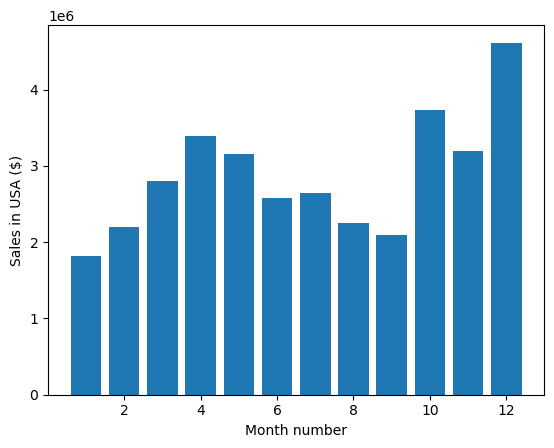

In [18]:
import matplotlib.pyplot as plt

plt.bar(results.index, results['Sales'])

plt.ylabel('Sales in USA ($)')

plt.xlabel('Month number')

plt.show()

#### <font color='blue'>Question 2: What city had the highest number of sales?</font>

#### Task 4: Add a city column

In [19]:
# Criando a coluna 'City'
city = all_data['Purchase Address'].str.split(',').str[1] 

code = all_data['Purchase Address'].str.split(',').str[2].str[1:3]

all_data['City'] = city + '-' + code

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001",1,11.99,New York City-NY
1,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016",1,11.95,San Francisco-CA
2,149343,Apple Airpods Headphones,1,150.00,01/01/19 04:56,"735 5th St, New York City, NY 10001",1,150.00,New York City-NY
3,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001",1,2.99,Dallas-TX
4,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301",1,23.90,Atlanta-GA


In [20]:
resp_2 = all_data[['City', 'Sales']].groupby('City').sum().sort_values(by = ['Sales'])
resp_2

,Sales
City,
Portland-ME,449758.27
Austin-TX,1819581.75
Portland-OR,1870732.34
Seattle-WA,2747755.48
Dallas-TX,2767975.40
Atlanta-GA,2795498.58
Boston-MA,3661642.01
New York City-NY,4664317.43
Los Angeles-CA,5452570.80


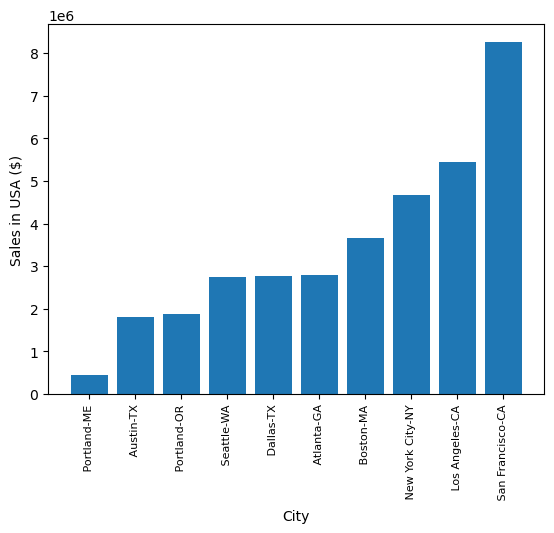

In [21]:
plt.bar(resp_2.index, resp_2['Sales'])

plt.xticks(rotation = 'vertical', size = 8)

plt.ylabel('Sales in USA ($)')

plt.xlabel('City')

plt.show()

#### <font color='blue'>Question 3: What time should we display advertisements to maximize likehood of customer's buying product?</font>

In [22]:
# Convertendo a coluna 'Order Date' para o formato DateTime;

all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",1,11.99,New York City-NY
1,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",1,11.95,San Francisco-CA
2,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",1,150.00,New York City-NY
3,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",1,2.99,Dallas-TX
4,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",1,23.90,Atlanta-GA


In [23]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",1,11.99,New York City-NY,3,7
1,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",1,11.95,San Francisco-CA,3,40
2,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",1,150.00,New York City-NY,4,56
3,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",1,2.99,Dallas-TX,5,53
4,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",1,23.90,Atlanta-GA,6,3


In [24]:
resp_3 = all_data[['Hour', 'Quantity Ordered']].groupby(['Hour']).count().sort_values(by = ['Quantity Ordered'], ascending=False)
resp_3

,Quantity Ordered
Hour,
19,12905
12,12587
11,12411
18,12280
20,12228
13,12129
14,10984
10,10944
21,10921


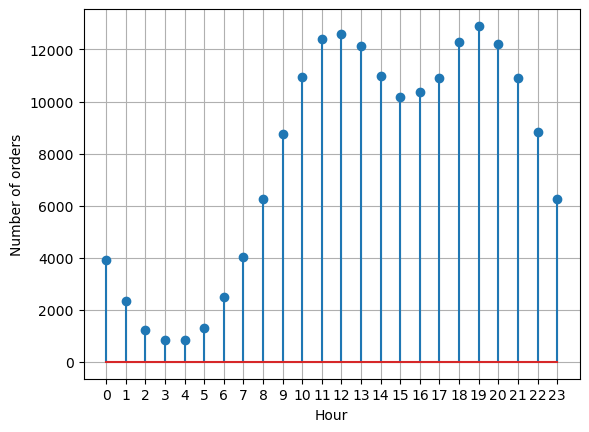

In [25]:
plt.stem(resp_3.index, resp_3['Quantity Ordered'])
plt.xticks(resp_3.index)
plt.xlabel('Hour')
plt.ylabel('Number of orders')
plt.grid()
plt.show()

#### <font color='blue'>Question 4: What products are most often sold together?</font>

In [26]:
# Aqui foi criado um DataFrame que mostra apenas as linhas que estão duplicadas, por isso reduziu
# a quantidade de linhas do DataFrame (all_data) original
df = all_data[all_data['Order ID'].duplicated(keep = False)]
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
11,144804,Wired Headphones,1,11.99,2019-01-01 07:29:00,"628 Lake St, New York City, NY 10001",1,11.99,New York City-NY,7,29
12,144804,iPhone,1,700.00,2019-01-01 07:29:00,"628 Lake St, New York City, NY 10001",1,700.00,New York City-NY,7,29
65,148074,USB-C Charging Cable,1,11.95,2019-01-01 11:25:00,"6 Johnson St, Atlanta, GA 30301",1,11.95,Atlanta-GA,11,25
66,148074,Google Phone,1,600.00,2019-01-01 11:25:00,"6 Johnson St, Atlanta, GA 30301",1,600.00,Atlanta-GA,11,25
79,148450,Lightning Charging Cable,1,14.95,2019-01-01 12:02:00,"761 Lakeview St, Dallas, TX 75001",1,14.95,Dallas-TX,12,2
...,...,...,...,...,...,...,...,...,...,...,...
185838,296804,AA Batteries (4-pack),1,3.84,2019-12-31 20:49:00,"114 10th St, Atlanta, GA 30301",12,3.84,Atlanta-GA,20,49
185839,301832,20in Monitor,2,109.99,2019-12-31 20:51:00,"774 Washington St, San Francisco, CA 94016",12,219.98,San Francisco-CA,20,51
185840,301832,AAA Batteries (4-pack),1,2.99,2019-12-31 20:51:00,"774 Washington St, San Francisco, CA 94016",12,2.99,San Francisco-CA,20,51
185895,311036,AAA Batteries (4-pack),3,2.99,2019-12-31 22:04:00,"138 Lincoln St, Los Angeles, CA 90001",12,8.97,Los Angeles-CA,22,4


In [27]:
#Essa linha concatenou os produtos que foram comprados juntos baseados no 'Order ID'
df['Group'] = df.groupby('Order ID')['Product'].transform(lambda product: ', '.join(product))
df

C:\Users\Janderson\AppData\Local\Temp\ipykernel_14588\1006331924.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Group'] = df.groupby('Order ID')['Product'].transform(lambda product: ', '.join(product))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Group
11,144804,Wired Headphones,1,11.99,2019-01-01 07:29:00,"628 Lake St, New York City, NY 10001",1,11.99,New York City-NY,7,29,"Wired Headphones, iPhone"
12,144804,iPhone,1,700.00,2019-01-01 07:29:00,"628 Lake St, New York City, NY 10001",1,700.00,New York City-NY,7,29,"Wired Headphones, iPhone"
65,148074,USB-C Charging Cable,1,11.95,2019-01-01 11:25:00,"6 Johnson St, Atlanta, GA 30301",1,11.95,Atlanta-GA,11,25,"USB-C Charging Cable, Google Phone"
66,148074,Google Phone,1,600.00,2019-01-01 11:25:00,"6 Johnson St, Atlanta, GA 30301",1,600.00,Atlanta-GA,11,25,"USB-C Charging Cable, Google Phone"
79,148450,Lightning Charging Cable,1,14.95,2019-01-01 12:02:00,"761 Lakeview St, Dallas, TX 75001",1,14.95,Dallas-TX,12,2,"Lightning Charging Cable, iPhone"
...,...,...,...,...,...,...,...,...,...,...,...,...
185838,296804,AA Batteries (4-pack),1,3.84,2019-12-31 20:49:00,"114 10th St, Atlanta, GA 30301",12,3.84,Atlanta-GA,20,49,"Lightning Charging Cable, AA Batteries (4-pack)"
185839,301832,20in Monitor,2,109.99,2019-12-31 20:51:00,"774 Washington St, San Francisco, CA 94016",12,219.98,San Francisco-CA,20,51,"20in Monitor, AAA Batteries (4-pack)"
185840,301832,AAA Batteries (4-pack),1,2.99,2019-12-31 20:51:00,"774 Washington St, San Francisco, CA 94016",12,2.99,San Francisco-CA,20,51,"20in Monitor, AAA Batteries (4-pack)"
185895,311036,AAA Batteries (4-pack),3,2.99,2019-12-31 22:04:00,"138 Lincoln St, Los Angeles, CA 90001",12,8.97,Los Angeles-CA,22,4,"AAA Batteries (4-pack), Macbook Pro Laptop"


In [28]:
# Aqui as linhas duplicadas serão escluídas caso o conteúdo de 'Order ID' e 'Group' seja igual.
df = df[['Order ID', 'Group']].drop_duplicates()
df

,Order ID,Group
11,144804,"Wired Headphones, iPhone"
65,148074,"USB-C Charging Cable, Google Phone"
79,148450,"Lightning Charging Cable, iPhone"
92,144679,"Google Phone, USB-C Charging Cable"
94,147451,"Google Phone, Wired Headphones"
...,...,...
185762,303147,"Lightning Charging Cable, iPhone"
185823,318458,"iPhone, Apple Airpods Headphones"
185834,296804,"Lightning Charging Cable, AA Batteries (4-pack)"
185839,301832,"20in Monitor, AAA Batteries (4-pack)"


In [29]:
from itertools import combinations
from collections import Counter

In [30]:
# Combinação dos produtos que são mais vendidos juntos

count = Counter()

for row in df['Group']:
    row_list = row.split(',')
    # Se alterar o valor de 2 para 3,4,5... Vai mostrar os produtos que são mais vendidos de trios, quadruplos...
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)

('iPhone', ' Lightning Charging Cable') 482
('Lightning Charging Cable', ' iPhone') 479
('Google Phone', ' USB-C Charging Cable') 474
('USB-C Charging Cable', ' Google Phone') 472
('iPhone', ' Wired Headphones') 236
('Wired Headphones', ' iPhone') 204
('Google Phone', ' Wired Headphones') 196
('Wired Headphones', ' Google Phone') 196
('USB-C Charging Cable', ' Vareebadd Phone') 179
('iPhone', ' Apple Airpods Headphones') 177


#### <font color='blue'>Question 5: What product sold the most? Why do you think it sold the most?</font>

In [31]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",1,11.99,New York City-NY,3,7
1,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",1,11.95,San Francisco-CA,3,40
2,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",1,150.00,New York City-NY,4,56
3,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",1,2.99,Dallas-TX,5,53
4,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",1,23.90,Atlanta-GA,6,3


In [32]:
resp_5 = all_data[['Product', 'Quantity Ordered']].groupby('Product').count().sort_values(by = ['Quantity Ordered'], ascending=False)
resp_5

,Quantity Ordered
Product,
USB-C Charging Cable,21903
Lightning Charging Cable,21658
AAA Batteries (4-pack),20641
AA Batteries (4-pack),20577
Wired Headphones,18882
Apple Airpods Headphones,15549
Bose SoundSport Headphones,13325
27in FHD Monitor,7507
iPhone,6842


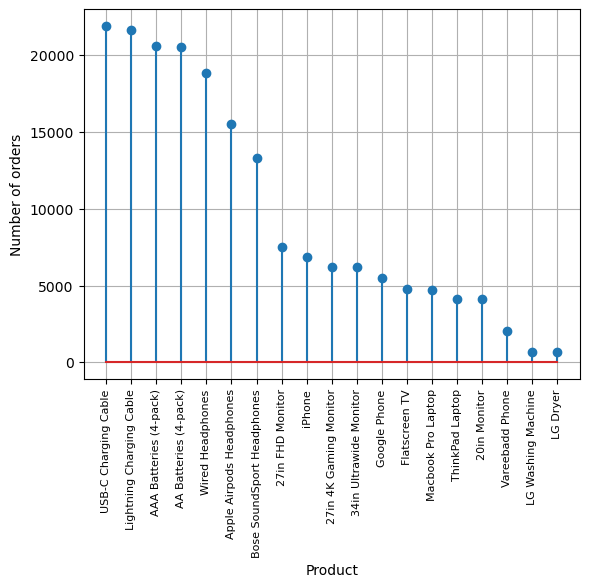

In [33]:
plt.stem(resp_5.index, resp_5['Quantity Ordered'])
plt.xticks(resp_5.index, rotation = 'vertical', size = 8)
plt.xlabel('Product')
plt.ylabel('Number of orders')
plt.grid()
plt.show()

In [35]:
prices = all_data.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

C:\Users\Janderson\AppData\Local\Temp\ipykernel_14588\1487679092.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(resp_5.index, rotation = 'vertical', size = 8)


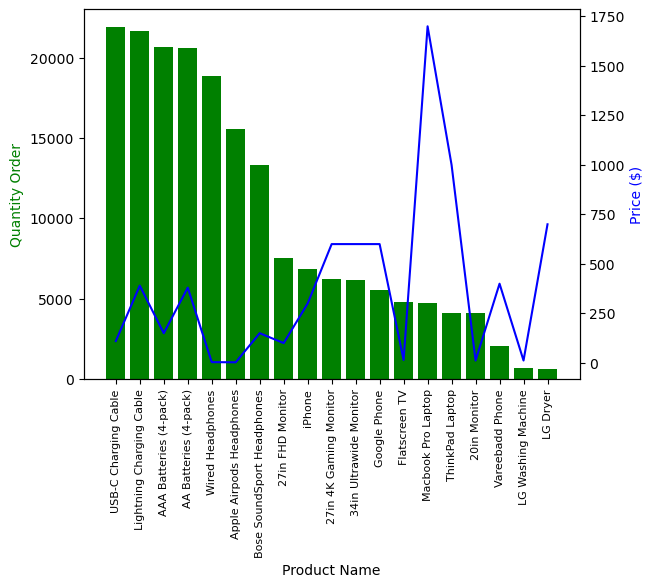

In [39]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(resp_5.index, resp_5['Quantity Ordered'], color = 'g')
ax2.plot(resp_5.index, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Order', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(resp_5.index, rotation = 'vertical', size = 8)

plt.show()